# Top N Time Series Feature Engineering Lessons From Kaggle
## TODO
![](images/pixabay.jpg)
<figcaption style="text-align: center;">
    <strong>
        Photo by 
        <a href='https://pixabay.com/users/pixaline-1569622/?utm_source=link-attribution&utm_medium=referral&utm_campaign=image&utm_content=1661767'> Pixaline</a>
        on 
        <a href='https://pixabay.com/?utm_source=link-attribution&utm_medium=referral&utm_campaign=image&utm_content=1661767'>Pixabay.</a> All images are by author unless specified otherwise.
    </strong>
</figcaption>

## Setup

In [1]:
import warnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

warnings.filterwarnings("ignore")

## Introduction

On Kaggle, everyone knows that to win a tabular competition, you need to *out-feature engineer* others. Almost anyone can perform awesome EDA, develop a validation strategy and tune hypermaraters to squeeze every bit of performance out of models. 

The key to the top is always feature engineering and it is not something taught in tutorials, books and courses. It is all about creativity, experience and domain knowledge. 

With the addition of the time component, feature engineering becomes even more important in time-series forecasting challenges. This has been proven once again by the top players who are participating in this month's (July) TPS Playground competition.

There have been so many brilliant examples of FE using the time component and some domain knowledge from meteorology that I have decided to write a generalized post on how to create new features for time-series data. Enjoy! #TODO

## 1. Feature Engineering goes hand-in-hand with EDA

> Effective feature engineering comes down to deep understanding of the dataset. 

To get preliminary ideas of how you can create new features, you need to perform EDA on existing columns. In time series, the most basic features you can extract are date-based. For example, you can extract the month number, day of the month, day of the week, part of the day (hour, is_morning or is_afternoon), etc.

This list of date-based features is pretty long and your initial EDA should help you narrow down the ones that may be worth exploring. For example, let's look at the sensor records of the TPS July dataset:

In [22]:
tps_july = pd.read_csv(
    "https://raw.githubusercontent.com/BexTuychiev/medium_stories/master/2021/july/6_stationarity_ts/data/tps_july_train.csv",
    parse_dates=["date_time"],
    index_col="date_time",
)

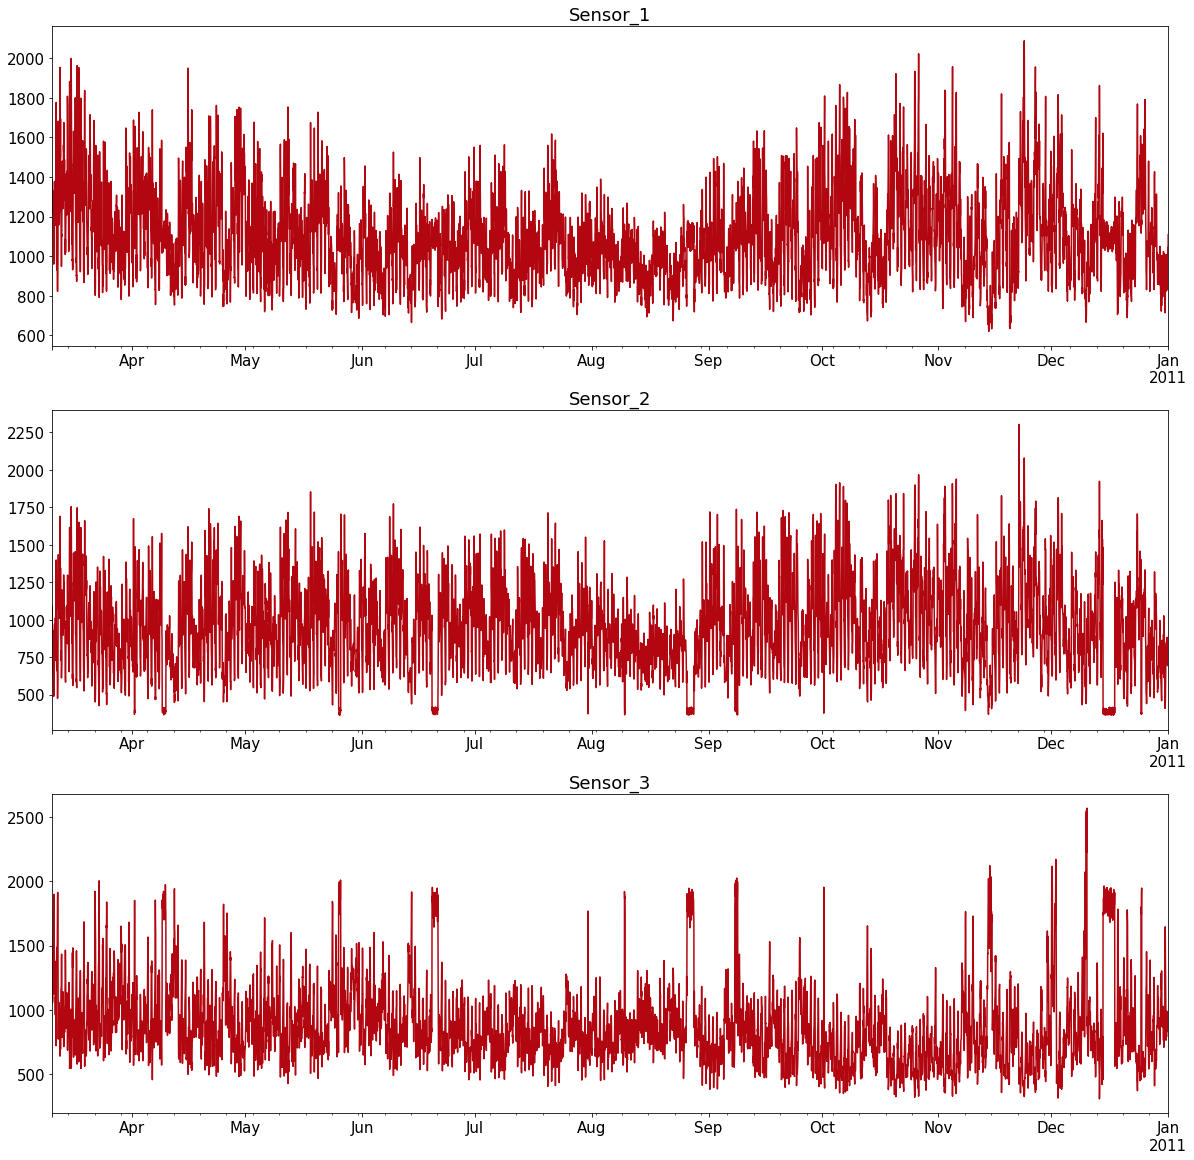

In [23]:
from matplotlib import rcParams

rcParams["font.size"] = 15
red = "#b20710"

fig, ax = plt.subplots(3, 1, figsize=(20, 20))

sensors = ["sensor_1", "sensor_2", "sensor_3"]
axes = ax.flatten()

for sensor, ax in zip(sensors, axes):
    tps_july[sensor].plot(color=red, ax=ax)
    ax.set(xlabel="", title=sensor.title())

plt.show();

Not much visible from these plots.

Let's get more granular and extract day of the month, day of the week and hour of the day attributes from the timestamps:

In [24]:
tps_july["Day of the Month"] = tps_july.index.day
tps_july["Day of the Week"] = tps_july.index.weekday
tps_july["Hour of the Day"] = tps_july.index.hour

We will plot the new features for the first sensor and aggregate to get the mean for each:

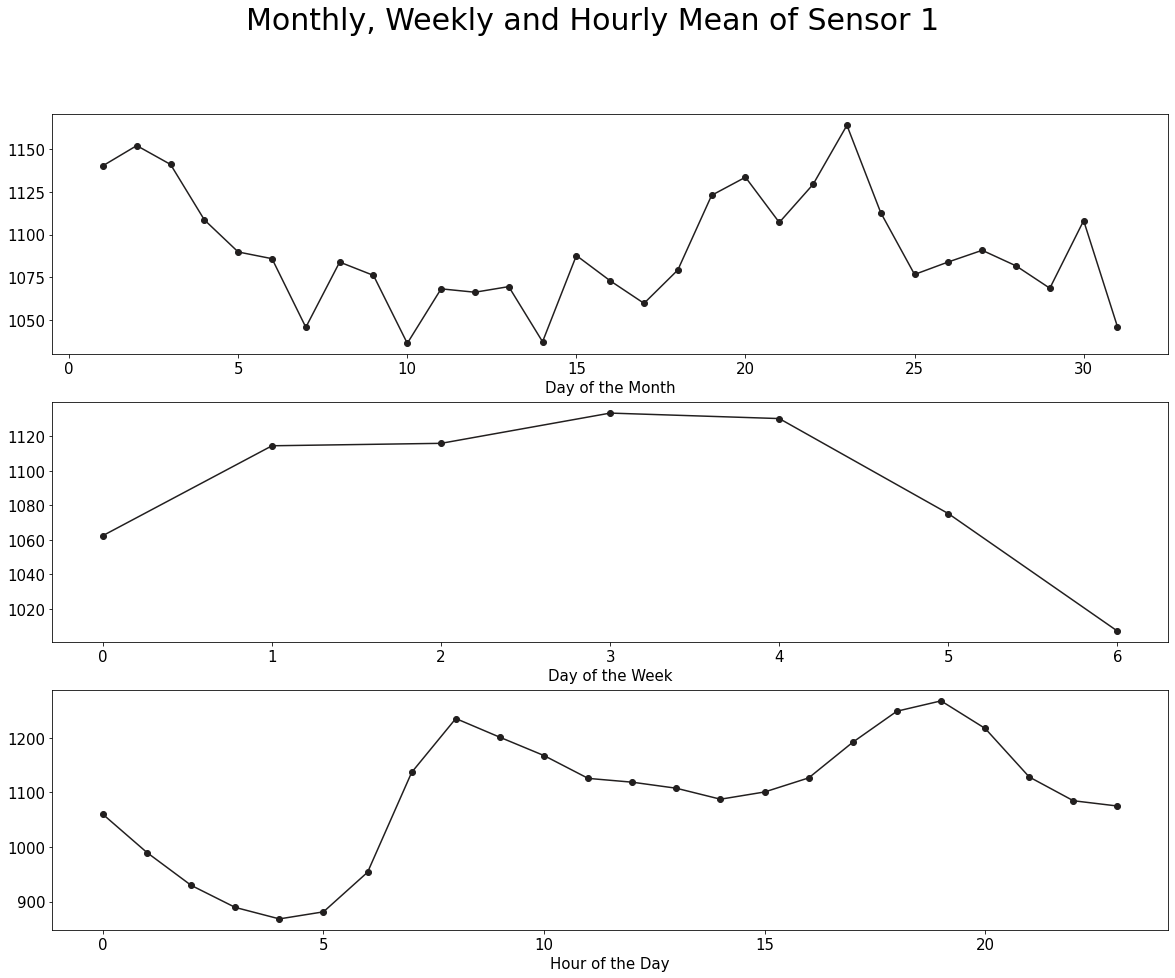

In [31]:
feature_names = ["Day of the Month", "Day of the Week", "Hour of the Day"]
black = "#221f1f"

fig, ax = plt.subplots(3, 1, figsize=(20, 15))
fig.suptitle("Monthly, Weekly and Hourly Mean of Sensor 1", fontsize=30)

for feature, ax in zip(feature_names, ax.flatten()):
    grouped = tps_july.groupby(feature)["sensor_1"].mean()
    grouped.plot(ax=ax, color=black, marker="o")

These plots tell us that sensor 1 values really plummet during the middle of the month, at weekends and increases significantly during the rush hours on a daily-basis. Especially, the second and third subplots hint that sensor 1 might measure the amount of substances that change based on the volume of moving vehicles. 

In general, any-time based feature you want to create should be analyzed closely by plotting them and see if they uncover new patterns that would otherwise have been invisible prior to the creation of these features. 

In other words, every feature you generate should help the predictive power of the models in some way. Many tutorials and courses suggest that you create every single possible feature you can extract from a timestamp like this:

![](https://miro.medium.com/proxy/1*BD7vlUoSAiS5hzS_seSDGQ.png)

If creating any of the above does not make sense or at least reveal basic patterns when plotted, they only add to model complexity and dimensionality of the dataset rather than being useful.

For example, adding the week of the year, month of the year and the year number would not be useful since the TPS data was only recorded over a single year. These features would just be noise as they are not enough for models to generalize over.

You should also not limit yourself to only default pandas functions to generate features. For example, there were some unconventional time-based features participants created that really helped the scores. These included encoding each sample if it was recorded at weekends (is_weekend) or during the office hours (within 8-19 hours).